# Twitter and WordCloud

### Imports

In [78]:
%%time
# Modules in use now
import twitter
import tweepy, random
from tweepy import OAuthHandler

# NLP processing
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
import re

# Data visuals
import matplotlib.pyplot as plt

# Collecting words
import collections
# Counting words
import numpy as np
# Load colour map
from matplotlib import cm

Wall time: 1 ms


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
search_term = input("Search on Twitter:")
_punctuation = list(punctuation) + ["``", "'s", "'", ".", '"', "n't", ]
extrawords = [w for w in STOPWORDS if w not in stopwords.words('english')]
stop_words = set(stopwords.words('english') + ['AT_USER', 'URL', 'rt',
                                               search_term.lower(), 'president'] + _punctuation + extrawords)

Search on Twitter:George Floyd


## Constants

In [1]:
CONSUMER_KEY = 'YOUR_KEY'
CONSUMER_SECRET = 'YOUR_KEY'
ACCESS_TOKEN_KEY = 'YOUR_KEY'
ACCESS_TOKEN_SECRET = 'YOUR_KEY'


#### Getting tweets from search term

In [81]:
twitter_api = twitter.Api(consumer_key=CONSUMER_KEY,
                          consumer_secret=CONSUMER_SECRET,
                          access_token_key=ACCESS_TOKEN_KEY,
                          access_token_secret=ACCESS_TOKEN_SECRET)

In [82]:
def get_searchterm_tweets(search_keyword):
    try:
        tweets_fetched = twitter_api.GetSearch(search_keyword, count=100, lang="en")
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        return [status.text for status in tweets_fetched]
    except:
        return None
    pass

In [103]:
%%time
searchterm_tweets = get_searchterm_tweets(search_term)
searchterm_tweets[:4]

Fetched 100 tweets for the term George Floyd
Wall time: 477 ms


['Will @CNN cover this the way they covered George Floyd? https://t.co/s9U3aGTqQ6',
 'Michael Brown,\nEric Garner,\nTamir Rice,\nPhilando Castile,\nStephon Clark,\nAtatiana Jefferson,\nBreonna Taylor,\nGeorge… https://t.co/9wMO36op3P',
 'Lori Lightfoot snaps at a reporter for pointing out that looters took advantage of the lack of consequences seen in… https://t.co/Ty546jdAqR',
 'RT @HunterAA6: "George Floyd was no angel! He was a CRIMINAL!" \n\nI debunk this pathetic way of thinking in less than 3 minutes! \n\nPLEASE RT…']

### Get tweets from timeline 

In [150]:
%%time
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# Define access api
api = tweepy.API(auth)

# Get tweets
timeline_tweets = []
for status in api.user_timeline():
    timeline_tweets.append(api.get_status(status.id).text)

Wall time: 7.04 s


In [151]:
timeline_tweets[:4]

["https://t.co/SnBAij6zOX\n\nA really interesting use of AI in social engineering. Wouldn't have thought this was actually possible.",
 'RT @Cory_Henry: Finally working on ableton .',
 'RT @Astro_Doug: Nine years ago today, I was honored to be a member of the crew of STS-135 #Atlantis as we launched from @NASAKennedy to clo…',
 'RT @WomeninID: You issued a statement in support of #BlackLivesMatter\nYour organisation has just celebrated #PRIDE month.\nBut what comes ne…']

## Processing Tweets

###### Helper function

In [152]:
def processTweets(DataSet):
    word_soup = []
    i = 0
    while i < len(DataSet):
        tweet = DataSet[i]
        tweet = tweet.lower()  # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)  # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet)  # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)  # remove the # in #hashtag
        tweet = word_tokenize(tweet)  # remove repeated characters (helloooooooo into hello)
        for word in tweet:
            if word not in stop_words:
                word_soup.append(word)  # append each word in each tweet to new word set

        i += 1
    return word_soup

### Analysing tweets from search term

In [153]:
searchterm_wordsoup = processTweets(searchterm_tweets)
s_tag_words = nltk.pos_tag(searchterm_wordsoup)
s_nouns = []
for word in s_tag_words:  # Extra bit to extract the most useful word type from the word soup, which is nouns
    if word[1] == 'NNS' or word[1] == 'NN':
        s_nouns.append(word[0])

In [154]:
%%time
all_s_nouns = ' '.join(s_nouns)

# Generate word cloud
s_wordcloud = WordCloud(font_path='orange juice 2.0.ttf', stopwords=stop_words,
                      background_color="black", max_words=3000,
                      width=1800, height=1400).generate(all_s_nouns)

Wall time: 10.2 s


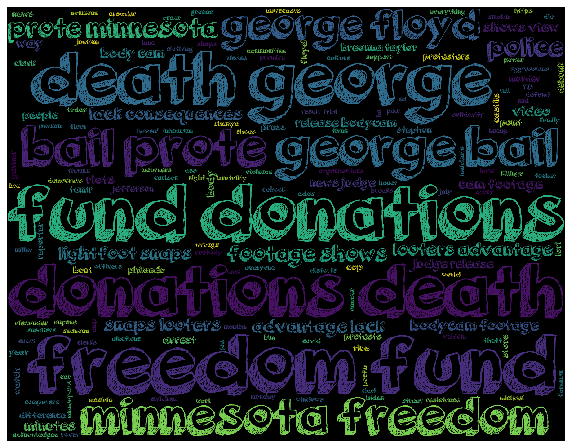

Wall time: 1.59 s


In [155]:
%%time
plt.figure(figsize=(10, 20))
plt.imshow(s_wordcloud)
plt.axis("off")
plt.show()

In [156]:
counted_s_words = collections.Counter(s_nouns)

In [157]:
s_words = []
s_counts = []
for letter, count in counted_s_words.most_common(10):
    s_words.append(letter)
    s_counts.append(count)

<BarContainer object of 10 artists>

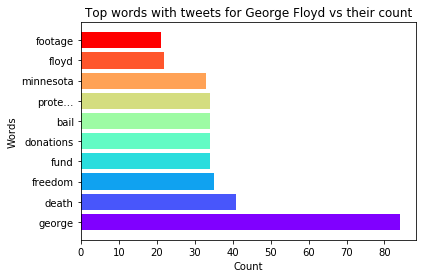

In [158]:
colours = cm.rainbow(np.linspace(0, 1, 10))
plt.title(f'Top words with tweets for {search_term} vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(s_words,s_counts, color=colours)

### Analysing tweets from timeline

In [159]:
timeline_wordsoup = processTweets(timeline_tweets)
t_tag_words = nltk.pos_tag(timeline_wordsoup)
t_nouns = []
for word in t_tag_words:  # Extra bit to extract the most useful word type from the word soup, which is nouns
    if word[1] == 'NNS' or word[1] == 'NN' or word[1] == 'JJ':
        t_nouns.append(word[0])

In [160]:
%%time
all_t_tweets = ' '.join(nouns)

# Generate WordCloud
t_wordcloud = WordCloud(font_path='GatsbyFLF-BoldItalic.ttf', stopwords=STOPWORDS, background_color='black', mask=None,
                      max_words=500, width=1800, height=1400).generate(all_t_tweets)

Wall time: 10.6 s


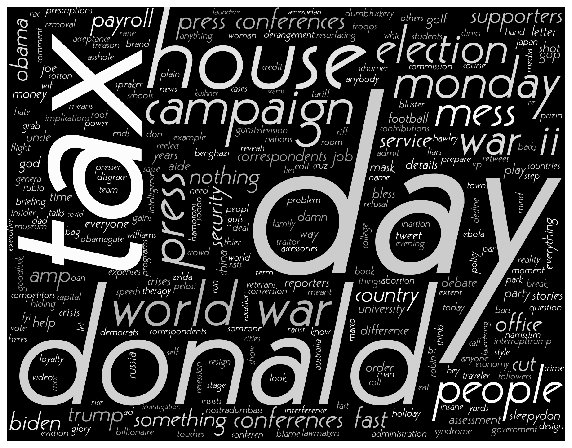

In [161]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

plt.figure(figsize=(10, 20))
plt.imshow(t_wordcloud.recolor(color_func=grey_color_func, random_state=3))
plt.axis('off')
plt.show()

In [162]:
counted_t_words = collections.Counter(t_nouns)

In [164]:
t_words = []
t_counts = []
for letter, count in counted_t_words.most_common(10):
    t_words.append(letter)
    t_counts.append(count)

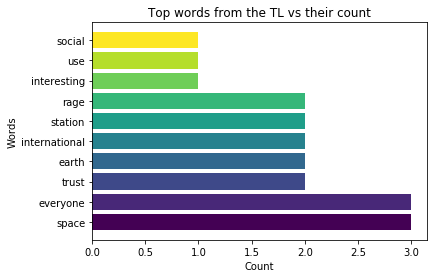

In [165]:
colours = cm.viridis(np.linspace(0, 1, 10))
plt.title('Top words from the TL vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(t_words, t_counts, color=colours)
plt.show()